# <center>基于搜索 - 北京地铁换乘</center>

数据抓取自北京地铁官方网站。计算站间距离采用相对距离，直接用北京地铁官方网站线路图的绘图坐标进行计算。

## 1.获取数据

In [1]:
import requests
from lxml import etree
import json
from collections import defaultdict


def parse():
    url = 'https://map.bjsubway.com/subwaymap/beijing.xml'
    header = {
        'User-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36',
    }
    response = requests.get(url, headers=header, verify=False)
    text = response.content.decode(encoding='utf-8')
    html = etree.HTML(text)
    lines = html.xpath('//l')
    infos = defaultdict(list)
    for line in lines:
        line_name = line.xpath('./@lb')[0]
        stations = line.xpath('./p')
        for station in stations:
            try:
                station_name = station.xpath('./@lb')[0]
                station_x_coord = station.xpath('./@x')[0]
                station_y_coord = station.xpath('./@y')[0]
                if not station_name:
                    continue
                infos[line_name].append(
                    {
                        'name': station_name,
                        'coord': (int(station_x_coord), -int(station_y_coord))
                    }
                )
            except:
                pass
    return infos

In [2]:
infos = parse()
print(infos)

C:\python\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


defaultdict(<class 'list'>, {'1号线': [{'name': '苹果园', 'coord': (280, -760)}, {'name': '古城', 'coord': (310, -790)}, {'name': '八角游乐园', 'coord': (363, -790)}, {'name': '八宝山', 'coord': (407, -790)}, {'name': '玉泉路', 'coord': (448, -790)}, {'name': '五棵松', 'coord': (488, -790)}, {'name': '万寿路', 'coord': (533, -790)}, {'name': '公主坟', 'coord': (589, -790)}, {'name': '军事博物馆', 'coord': (628, -790)}, {'name': '木樨地', 'coord': (688, -790)}, {'name': '南礼士路', 'coord': (733, -790)}, {'name': '复兴门', 'coord': (783, -790)}, {'name': '西单', 'coord': (862, -790)}, {'name': '天安门西', 'coord': (922, -790)}, {'name': '天安门东', 'coord': (979, -790)}, {'name': '王府井', 'coord': (1034, -790)}, {'name': '东单', 'coord': (1065, -790)}, {'name': '建国门', 'coord': (1134, -790)}, {'name': '永安里', 'coord': (1184, -790)}, {'name': '国贸', 'coord': (1236, -790)}, {'name': '大望路', 'coord': (1288, -790)}, {'name': '四惠', 'coord': (1334, -790)}, {'name': '四惠东', 'coord': (1373, -790)}], '2号线': [{'name': '西直门', 'coord': (783, -660)}, {'name':

In [3]:
# 特殊站点处理
infos['八通线'][0]['coord'] = (1334, -790)
infos['八通线'][1]['coord'] = (1373, -790)
infos['2号线'].append({'name': '西直门', 'coord': (783, -660)})
infos['10号线'].append({'name': '丰台站', 'coord': (611, -974)})

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']

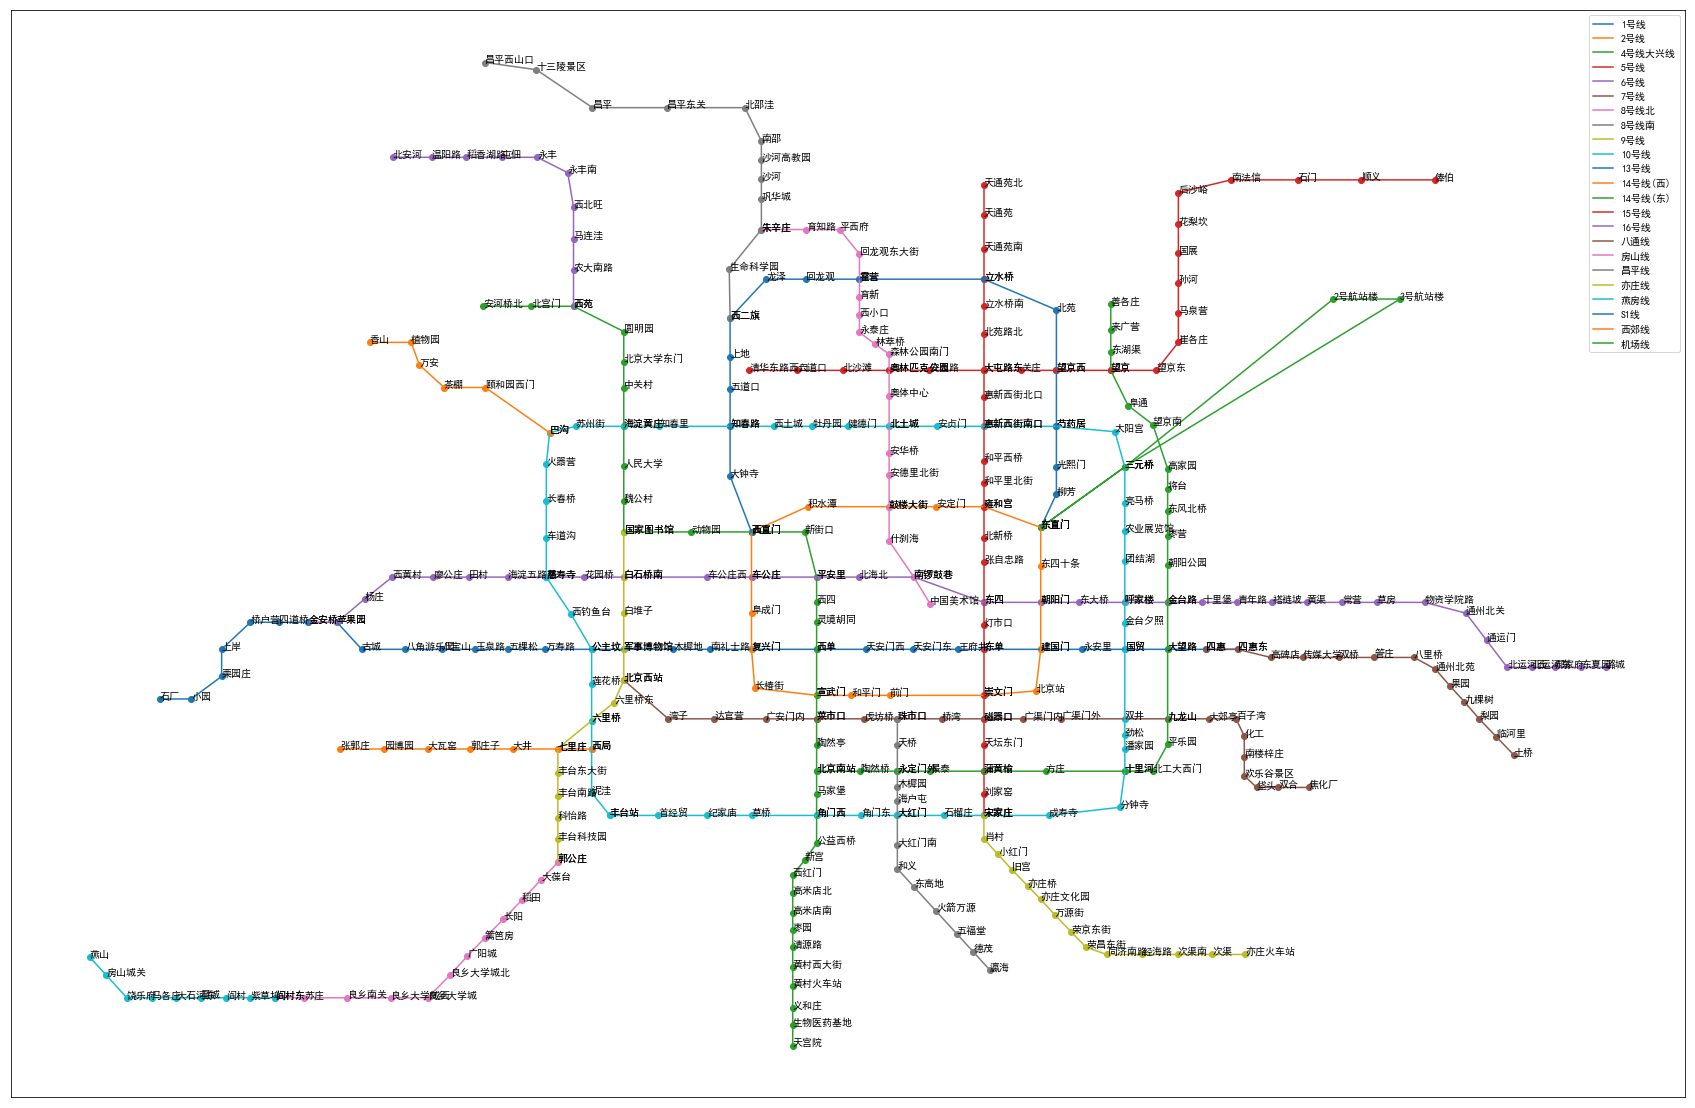

In [5]:
plt.figure(figsize=(30, 20))
trans = defaultdict(list)
for line, info in infos.items():
    line_coords = []
    line_names = []
    for station in info:
        line_coords.append(station['coord'])
        line_names.append(station['name'])
        plt.text(*station['coord'], station['name'])
    plt.plot(*zip(*line_coords), label=line)
    plt.scatter(*zip(*line_coords))
plt.legend() 
plt.xticks([])
plt.yticks([])
plt.show()

## 2.数据处理

In [6]:
coords = defaultdict(list)
for line, info in infos.items():
    for station in info:
        coords[station['name']] = station['coord']
coords

defaultdict(list,
            {'苹果园': (280, -760),
             '古城': (310, -790),
             '八角游乐园': (363, -790),
             '八宝山': (407, -790),
             '玉泉路': (448, -790),
             '五棵松': (488, -790),
             '万寿路': (533, -790),
             '公主坟': (589, -790),
             '军事博物馆': (628, -790),
             '木樨地': (688, -790),
             '南礼士路': (733, -790),
             '复兴门': (783, -790),
             '西单': (862, -790),
             '天安门西': (922, -790),
             '天安门东': (979, -790),
             '王府井': (1034, -790),
             '东单': (1065, -790),
             '建国门': (1134, -790),
             '永安里': (1184, -790),
             '国贸': (1236, -790),
             '大望路': (1288, -790),
             '四惠': (1334, -790),
             '四惠东': (1373, -790),
             '西直门': (783, -660),
             '积水潭': (851, -632),
             '鼓楼大街': (950, -632),
             '安定门': (1007, -632),
             '雍和宫': (1065, -632),
             '东直门': (1134, -655),
           

In [7]:
%pip install networkx

Looking in indexes: https://mirrors.aliyun.com/pypi/simple
Note: you may need to restart the kernel to use updated packages.


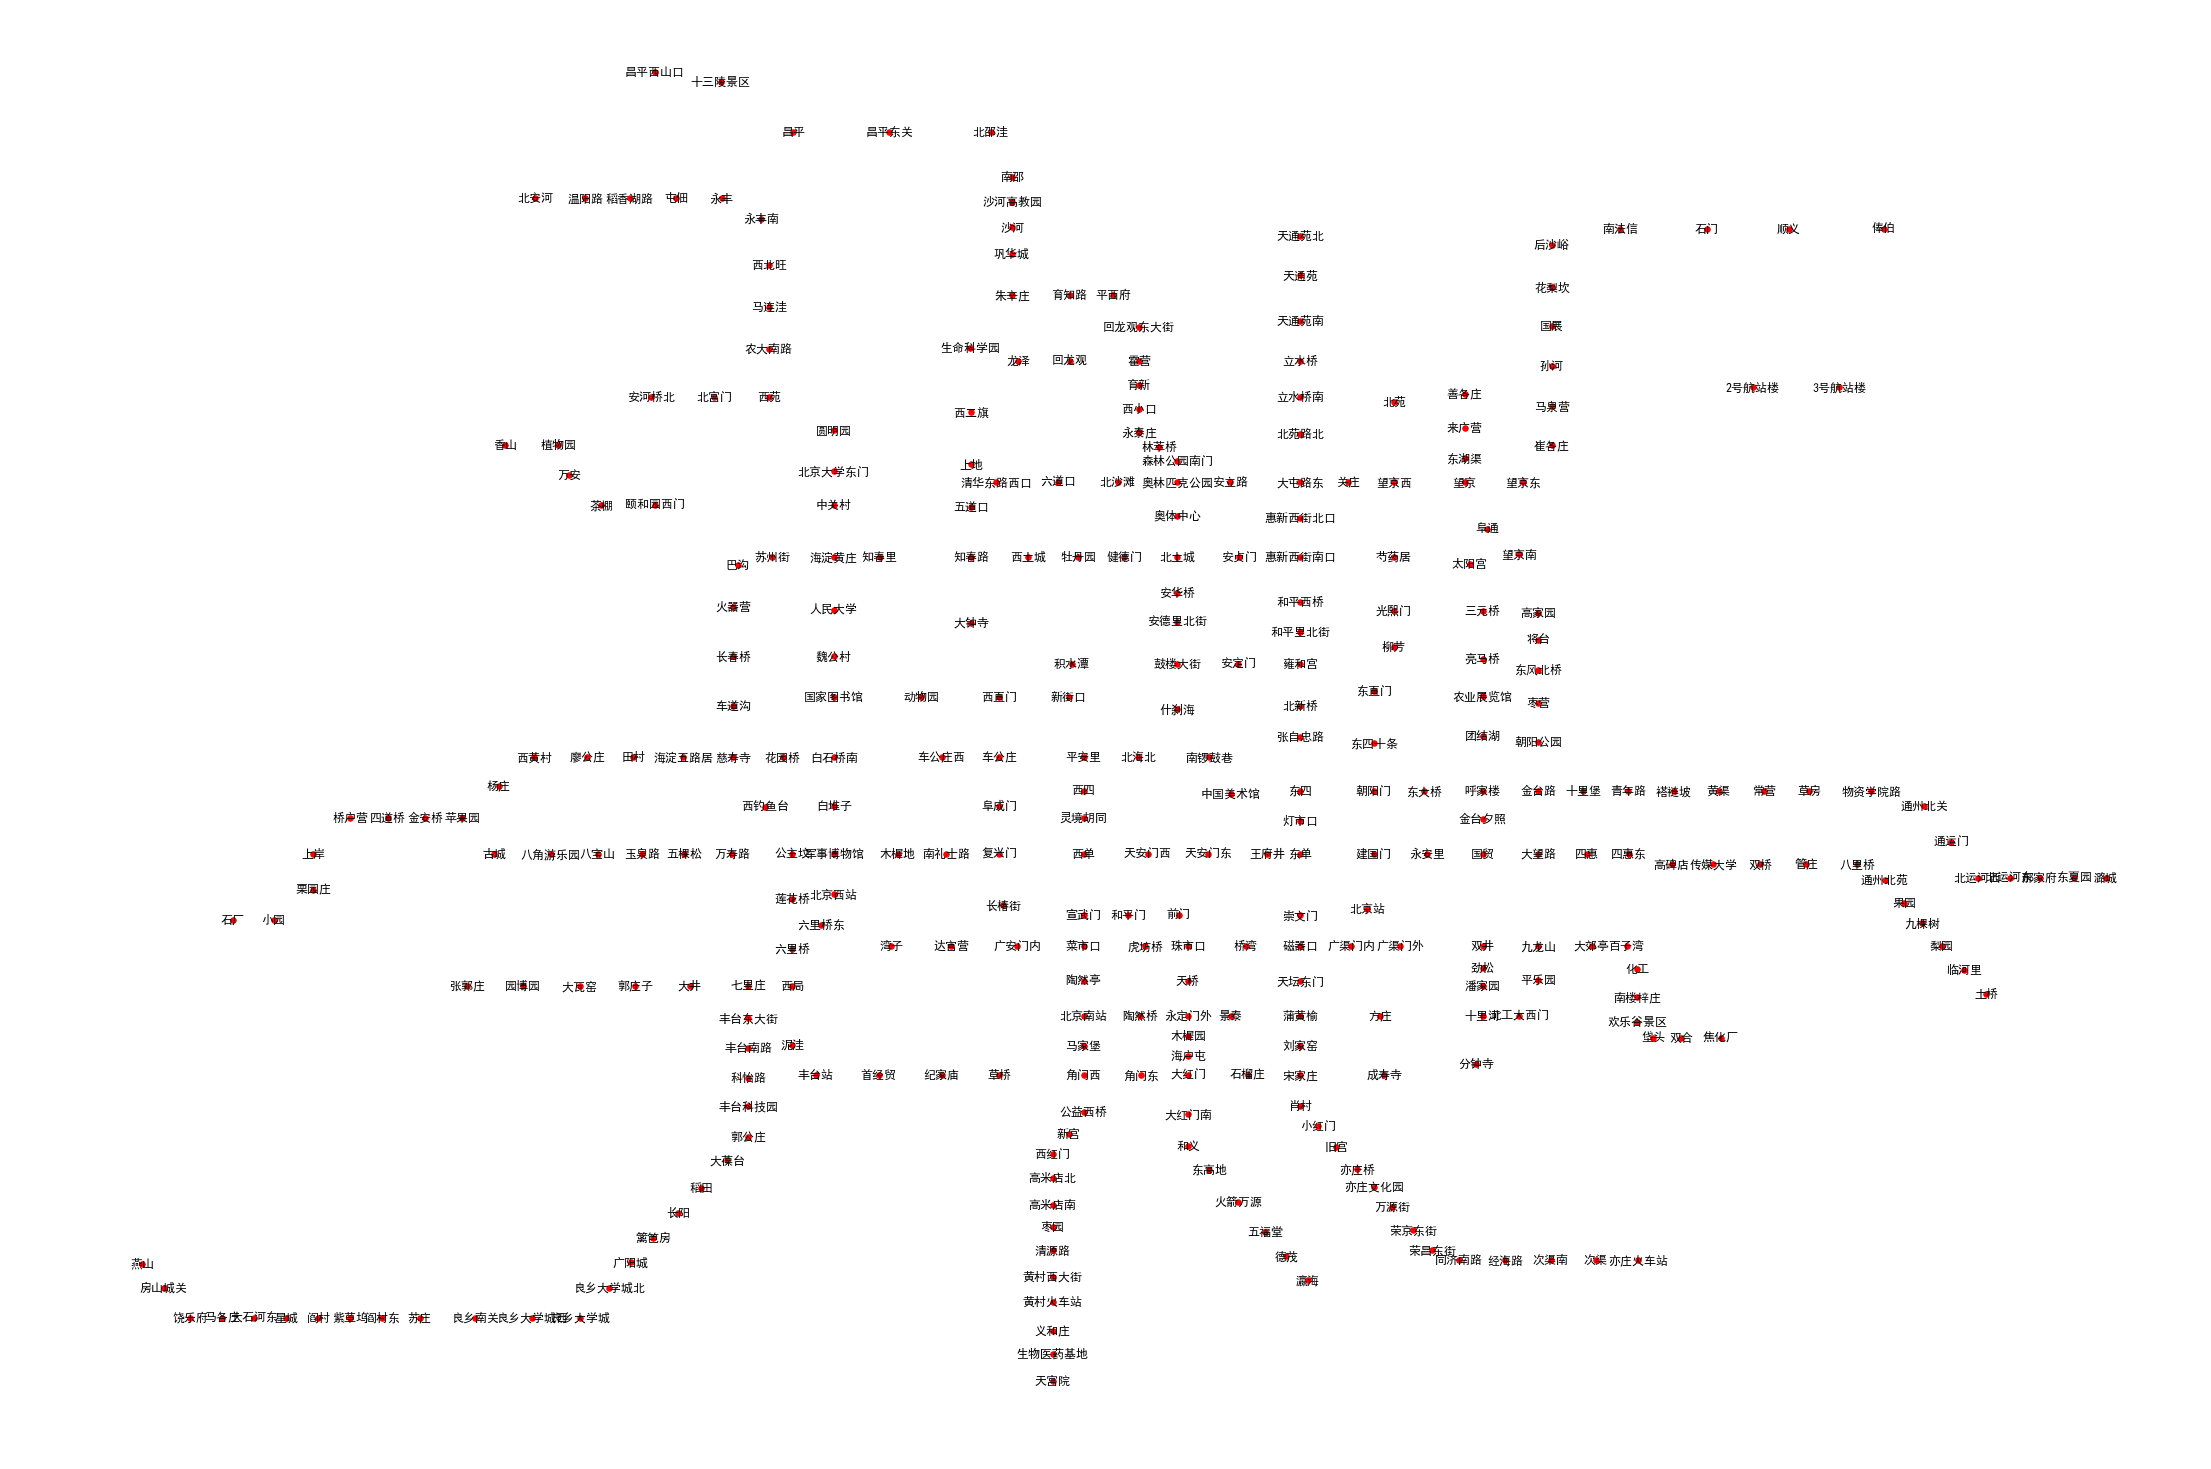

In [8]:
import networkx as nx
graph = nx.Graph()
graph.add_nodes_from(list(coords.keys()))
plt.figure(figsize=(30,20))
nx.draw(graph, coords, with_labels=True, node_size=30)

In [9]:
connection = defaultdict(list)
for line, info in infos.items():
    for i, station in enumerate(info):
        if i == 0:
            connection[station['name']].append(info[i+1]['name'])
        elif i == len(info) - 1:
            connection[station['name']].append(info[i-1]['name'])
        else:
            connection[station['name']].append(info[i+1]['name'])
            connection[station['name']].append(info[i-1]['name'])

In [10]:
connection

defaultdict(list,
            {'苹果园': ['古城', '杨庄', '金安桥'],
             '古城': ['八角游乐园', '苹果园'],
             '八角游乐园': ['八宝山', '古城'],
             '八宝山': ['玉泉路', '八角游乐园'],
             '玉泉路': ['五棵松', '八宝山'],
             '五棵松': ['万寿路', '玉泉路'],
             '万寿路': ['公主坟', '五棵松'],
             '公主坟': ['军事博物馆', '万寿路', '西钓鱼台', '莲花桥'],
             '军事博物馆': ['木樨地', '公主坟', '白堆子', '北京西站'],
             '木樨地': ['南礼士路', '军事博物馆'],
             '南礼士路': ['复兴门', '木樨地'],
             '复兴门': ['西单', '南礼士路', '阜成门', '长椿街'],
             '西单': ['天安门西', '复兴门', '宣武门', '灵境胡同'],
             '天安门西': ['天安门东', '西单'],
             '天安门东': ['王府井', '天安门西'],
             '王府井': ['东单', '天安门东'],
             '东单': ['建国门', '王府井', '崇文门', '灯市口'],
             '建国门': ['永安里', '东单', '北京站', '朝阳门'],
             '永安里': ['国贸', '建国门'],
             '国贸': ['大望路', '永安里', '双井', '金台夕照'],
             '大望路': ['四惠', '国贸', '九龙山', '金台路'],
             '四惠': ['四惠东', '大望路', '四惠东'],
             '四惠东': ['四惠', '高碑店', '四惠'],
             '

C:\python\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


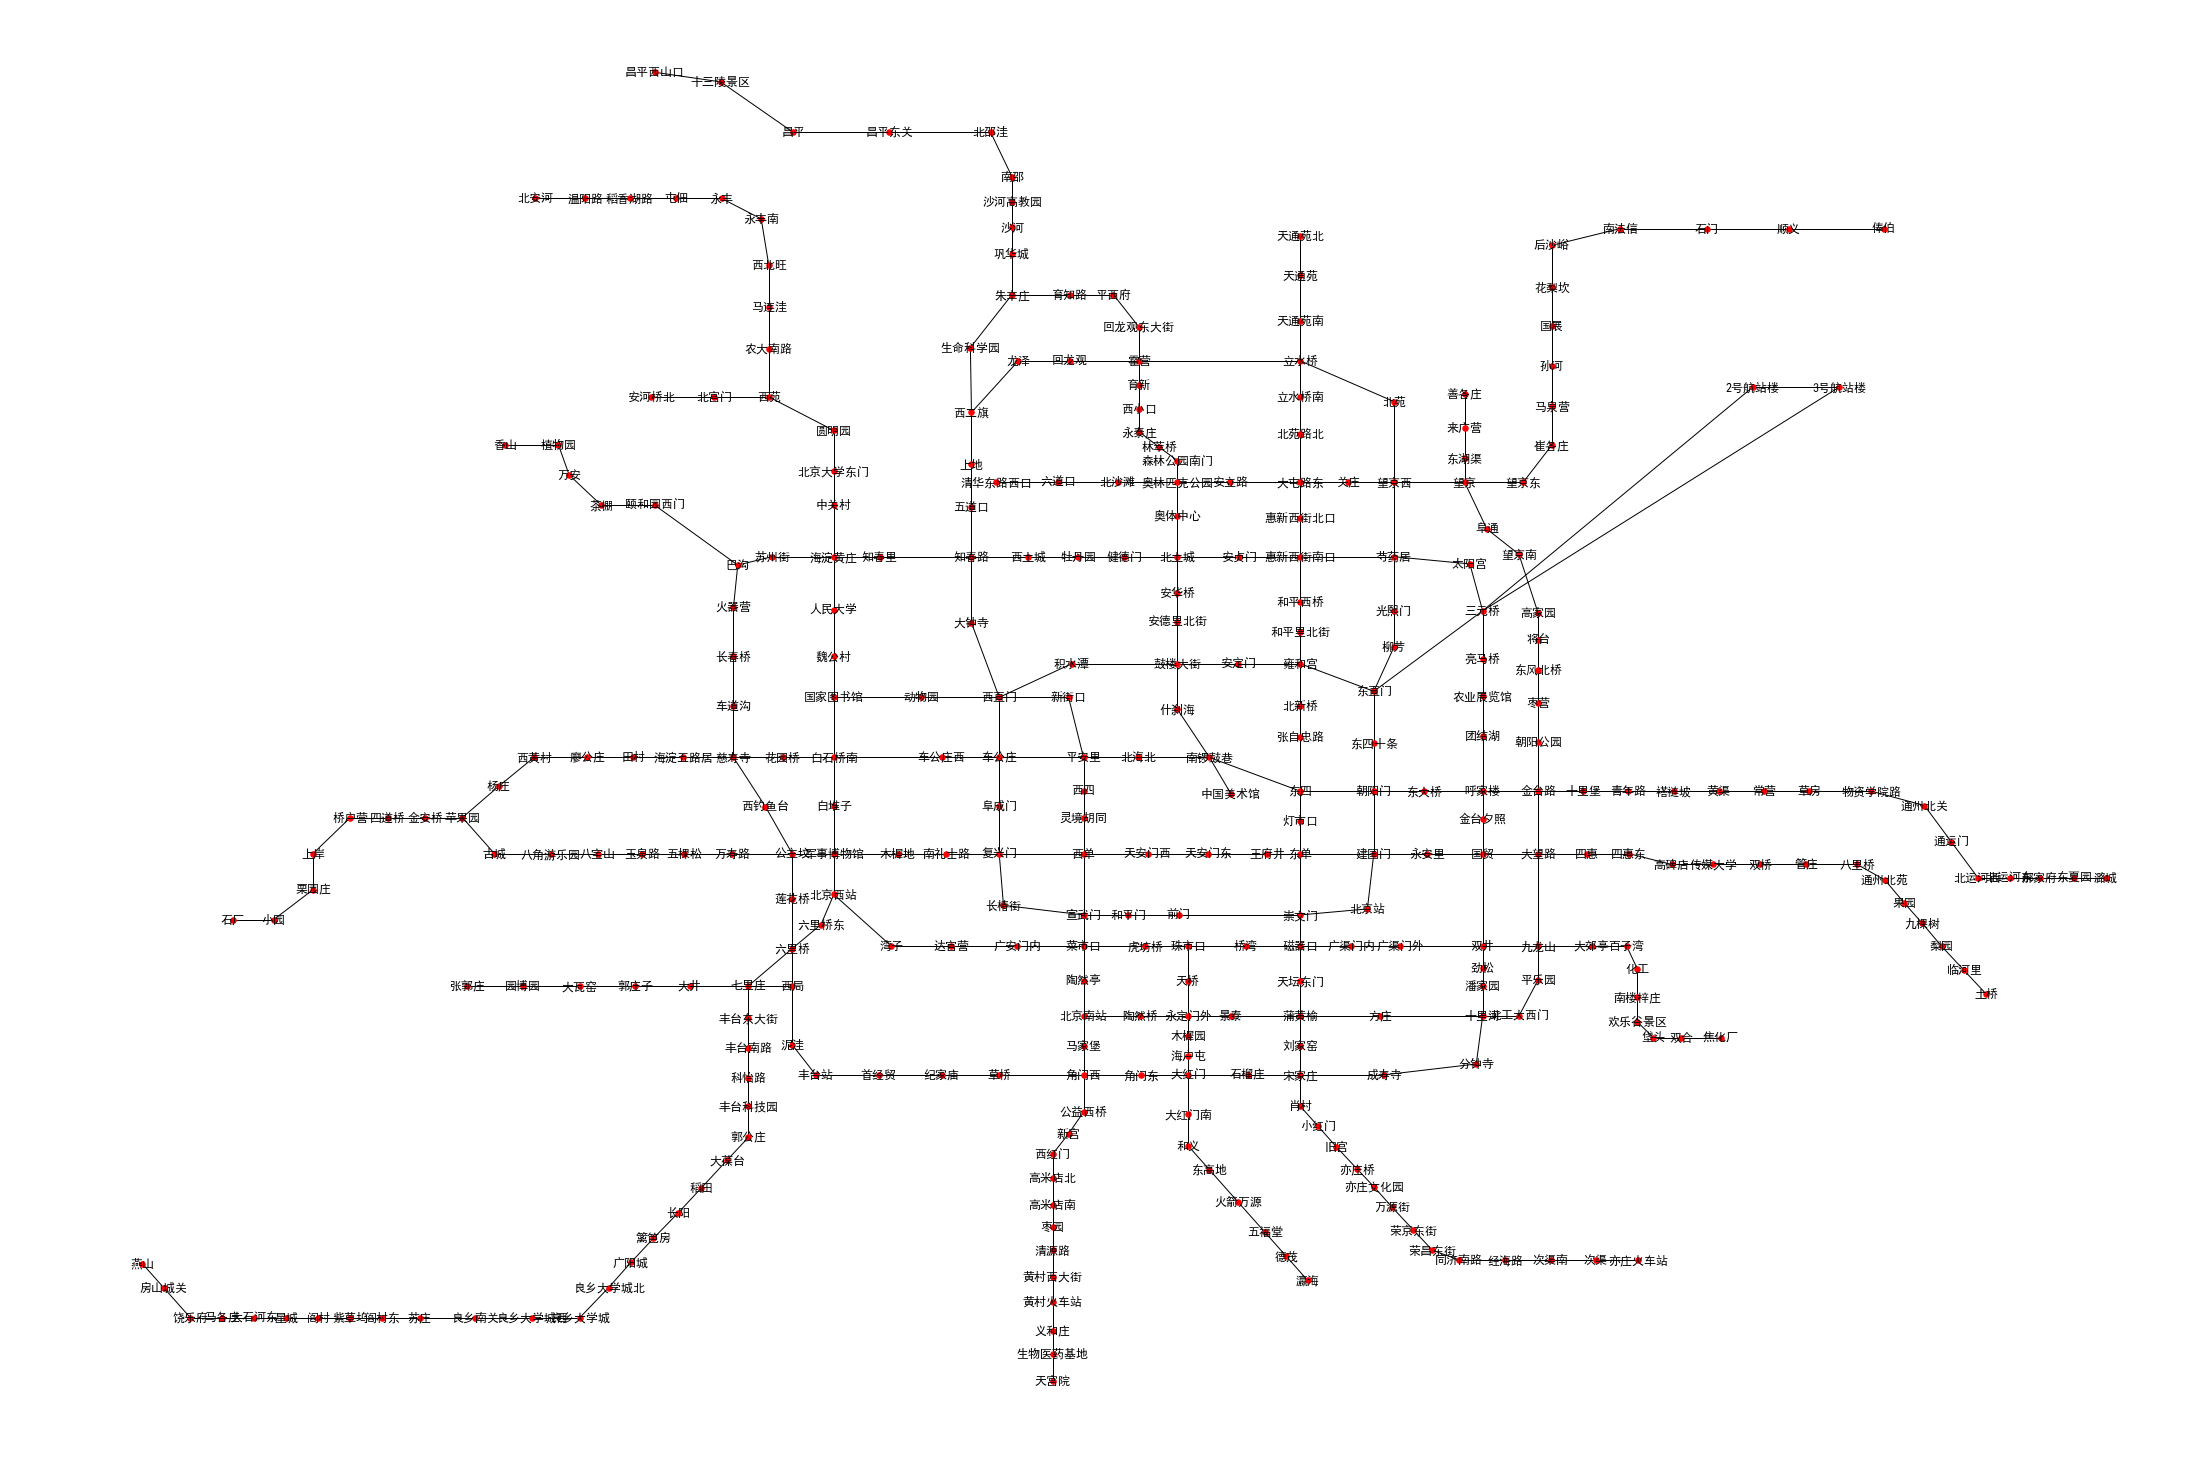

In [11]:
graph_line = nx.Graph(connection)
plt.figure(figsize=(30,20))
nx.draw(graph_line, coords, with_labels=True, node_size=30)

In [12]:
lines = defaultdict(set)
for line, info in infos.items():
    for station in info:
        lines[station['name']].add(line)
lines

defaultdict(set,
            {'苹果园': {'1号线', '6号线'},
             '古城': {'1号线'},
             '八角游乐园': {'1号线'},
             '八宝山': {'1号线'},
             '玉泉路': {'1号线'},
             '五棵松': {'1号线'},
             '万寿路': {'1号线'},
             '公主坟': {'10号线', '1号线'},
             '军事博物馆': {'1号线', '9号线'},
             '木樨地': {'1号线'},
             '南礼士路': {'1号线'},
             '复兴门': {'1号线', '2号线'},
             '西单': {'1号线', '4号线大兴线'},
             '天安门西': {'1号线'},
             '天安门东': {'1号线'},
             '王府井': {'1号线'},
             '东单': {'1号线', '5号线'},
             '建国门': {'1号线', '2号线'},
             '永安里': {'1号线'},
             '国贸': {'10号线', '1号线'},
             '大望路': {'14号线(东)', '1号线'},
             '四惠': {'1号线', '八通线'},
             '四惠东': {'1号线', '八通线'},
             '西直门': {'13号线', '2号线', '4号线大兴线'},
             '积水潭': {'2号线'},
             '鼓楼大街': {'2号线', '8号线北'},
             '安定门': {'2号线'},
             '雍和宫': {'2号线', '5号线'},
             '东直门': {'13号线', '2号线', '机场线'},
     

## 3.搜索实现

In [13]:
class RouteSearcher(object):
    def __init__(self, coords, connection, lines, way='station', self_way=None):
        """
        初始化参数
        :param coords: dict 各站点的坐标 - > {站1：(x1, y1), 站2：(x2,y2) ……}
        :param connection: dict  站点链接网 -> {站1：[站a，站b], 站2: [站x，站y，站z] ……}
        :param lines: dict 地铁线路信息 -> {站1：{线路a，线路b}, 站2: {线路x，线路y，线路z} ……} ，里面为线路集合
        :param way str 设置搜索路径的方案。可通过 set_route_form 方法重置
            'distance' -> 最短距离
            'station' -> 最少站点
            'trans' -> 最少换乘（最少线路）
            'self' -> 自定义
        :param self_way func 自定义查找路线的形式，需将 way 设置为'self'这里才生效
        """
        self.connection = connection
        self.coords = coords
        self.lines = lines
        self.set_route_form(way, self_way)
        
    def set_route_form(self, way='station', self_way=None):
        if way == 'self':
            self.way = self_way
        elif way == 'distance':
            self.way = self.get_distance
        elif way == 'trans':
            self.way = self.get_trans
        else:
            self.way = self.get_station
    
    def get_distance(self, path):
        '''以距离排序函数'''
        distance = 0
        if len(path) > 1:
            for i, station in enumerate(path[:-1]):
                next_station = path[i+1]
                x1, y1 = self.coords[station]
                x2, y2 = self.coords[next_station]
                distance += ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5
        return distance
        
    def get_station(self, path):
        '''以经过车站个数排序函数'''
        return len(path)
    
    def get_trans(self, path):
        '''以换乘线路个数排序函数'''
        trans = -1
        lines = []
        if len(path) > 1:
            for i, station in enumerate(path[:-1]):
                next_station = path[i+1]
                line = self.lines[station] & self.lines[next_station]
                if line in lines:
                    continue
                lines.append(line)
                trans += 1
        return trans
    
    def get_route(self, start, end):
        """
        获取路径
        :param start str 起始站点
        :param end str 终止站点
        """
        pathes = [[start]]
        visited = set()
        while pathes:
            path = pathes.pop(0)
            front_station = path[-1]
            if front_station in visited:
                continue
            for station in self.connection[front_station]:
                if station in path:
                    continue
                new_path = path + [station]
                pathes.append(new_path)
                if station == end:
                    return self.add_line(new_path)
            visited.add(front_station)
            pathes = sorted(pathes, key=self.way)
            
    def add_line(self, path):
        '''加入路径上面的各站点所在线路'''
        new_path = []
        for i, station in enumerate(path[:-1]):
            next_station = path[i+1]
            line = (self.lines[station] & self.lines[next_station]).pop()
            new_path.append((station, line))
        last_line = new_path[-1][1]
        new_path.append((path[-1], last_line))
        return new_path
                

## 4 测试

In [14]:
route = RouteSearcher(coords, connection, lines)

In [15]:
def show_result(path_with_line):
    path = list(zip(*path_with_line))[0]
    distance = route.get_distance(path)
    station = route.get_station(path)
    trans = route.get_trans(path)
    print(path_with_line)
    print('-'*50)
    print('距离：%.2f\n站数：%d\n换乘次数：%d' % (distance, station, trans))
    path_coords = [coords[x] for x in path]
    graph_line = nx.Graph(connection)
    plt.figure(figsize=(30,20))
    nx.draw(graph_line, coords, with_labels=True, node_size=30)
    plt.plot(*zip(*path_coords), linewidth=10, c='r', alpha=0.5)

### 测试1

In [16]:
travel = ('沙河', '新宫')

##### 最小距离的路径

[('沙河', '昌平线'), ('巩华城', '昌平线'), ('朱辛庄', '昌平线'), ('生命科学园', '昌平线'), ('西二旗', '13号线'), ('上地', '13号线'), ('五道口', '13号线'), ('知春路', '13号线'), ('大钟寺', '13号线'), ('西直门', '4号线大兴线'), ('新街口', '4号线大兴线'), ('平安里', '4号线大兴线'), ('西四', '4号线大兴线'), ('灵境胡同', '4号线大兴线'), ('西单', '4号线大兴线'), ('宣武门', '4号线大兴线'), ('菜市口', '4号线大兴线'), ('陶然亭', '4号线大兴线'), ('北京南站', '4号线大兴线'), ('马家堡', '4号线大兴线'), ('角门西', '4号线大兴线'), ('公益西桥', '4号线大兴线'), ('新宫', '4号线大兴线')]
--------------------------------------------------
距离：845.76
站数：23
换乘次数：2


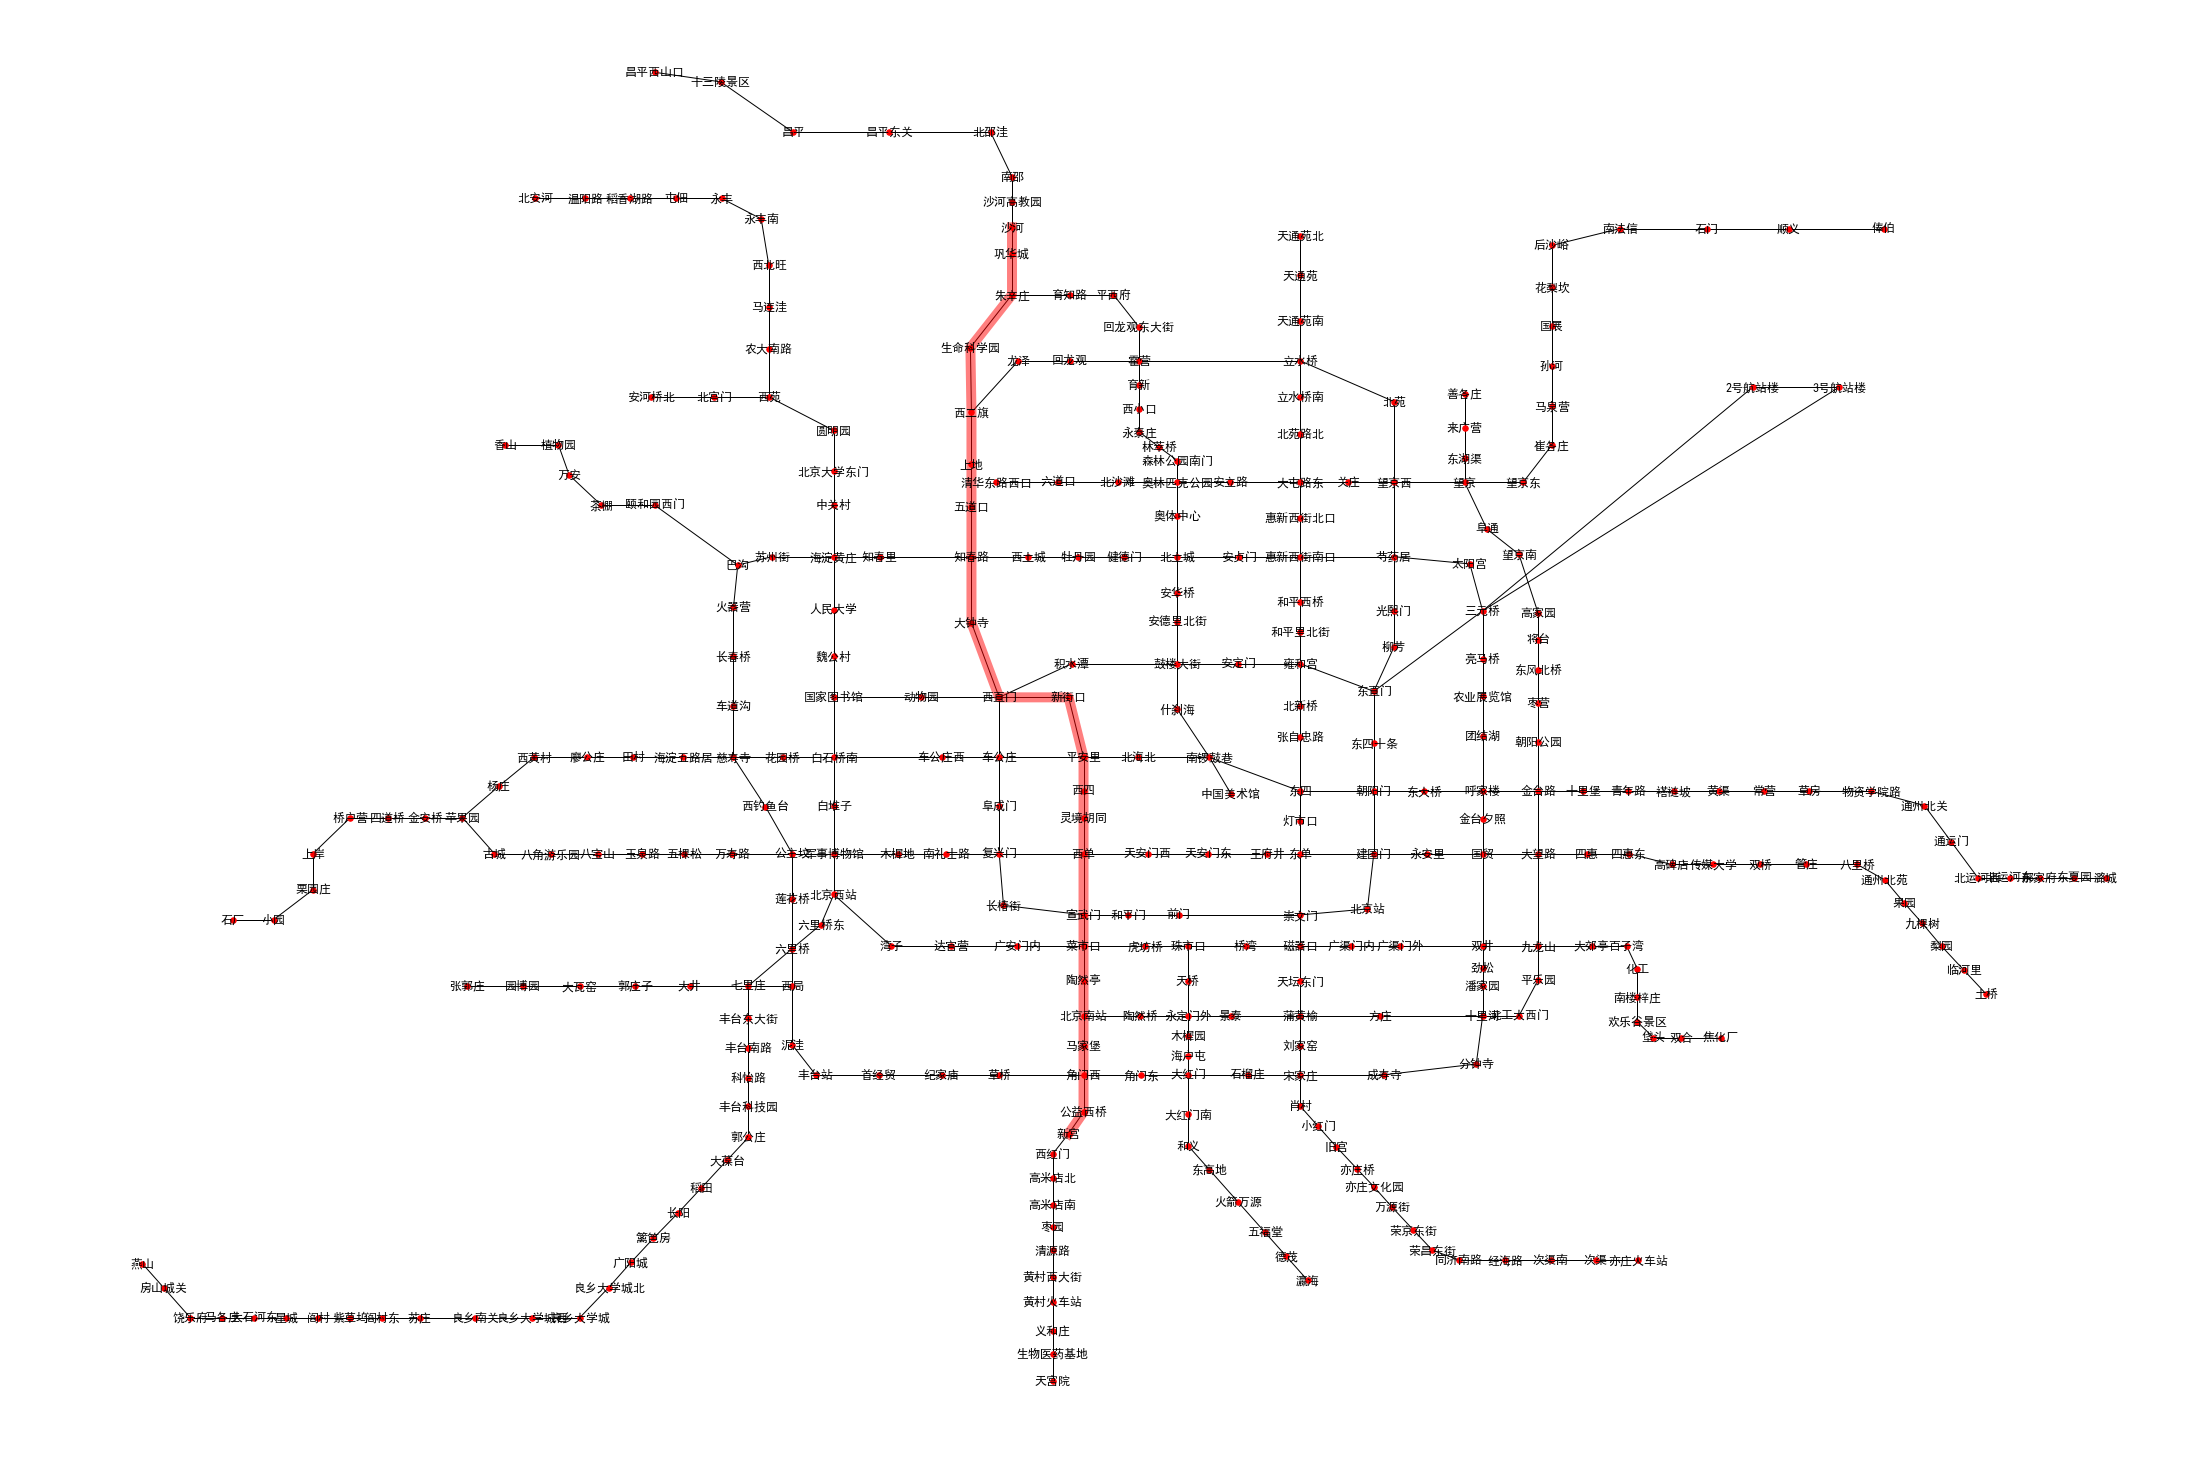

In [17]:
route.set_route_form('distance')
path_with_line = route.get_route(*travel)
show_result(path_with_line)

##### 最少站数的路径

[('沙河', '昌平线'), ('巩华城', '昌平线'), ('朱辛庄', '昌平线'), ('生命科学园', '昌平线'), ('西二旗', '13号线'), ('上地', '13号线'), ('五道口', '13号线'), ('知春路', '13号线'), ('大钟寺', '13号线'), ('西直门', '2号线'), ('车公庄', '2号线'), ('阜成门', '2号线'), ('复兴门', '1号线'), ('西单', '4号线大兴线'), ('宣武门', '4号线大兴线'), ('菜市口', '4号线大兴线'), ('陶然亭', '4号线大兴线'), ('北京南站', '4号线大兴线'), ('马家堡', '4号线大兴线'), ('角门西', '4号线大兴线'), ('公益西桥', '4号线大兴线'), ('新宫', '4号线大兴线')]
--------------------------------------------------
距离：857.84
站数：22
换乘次数：4


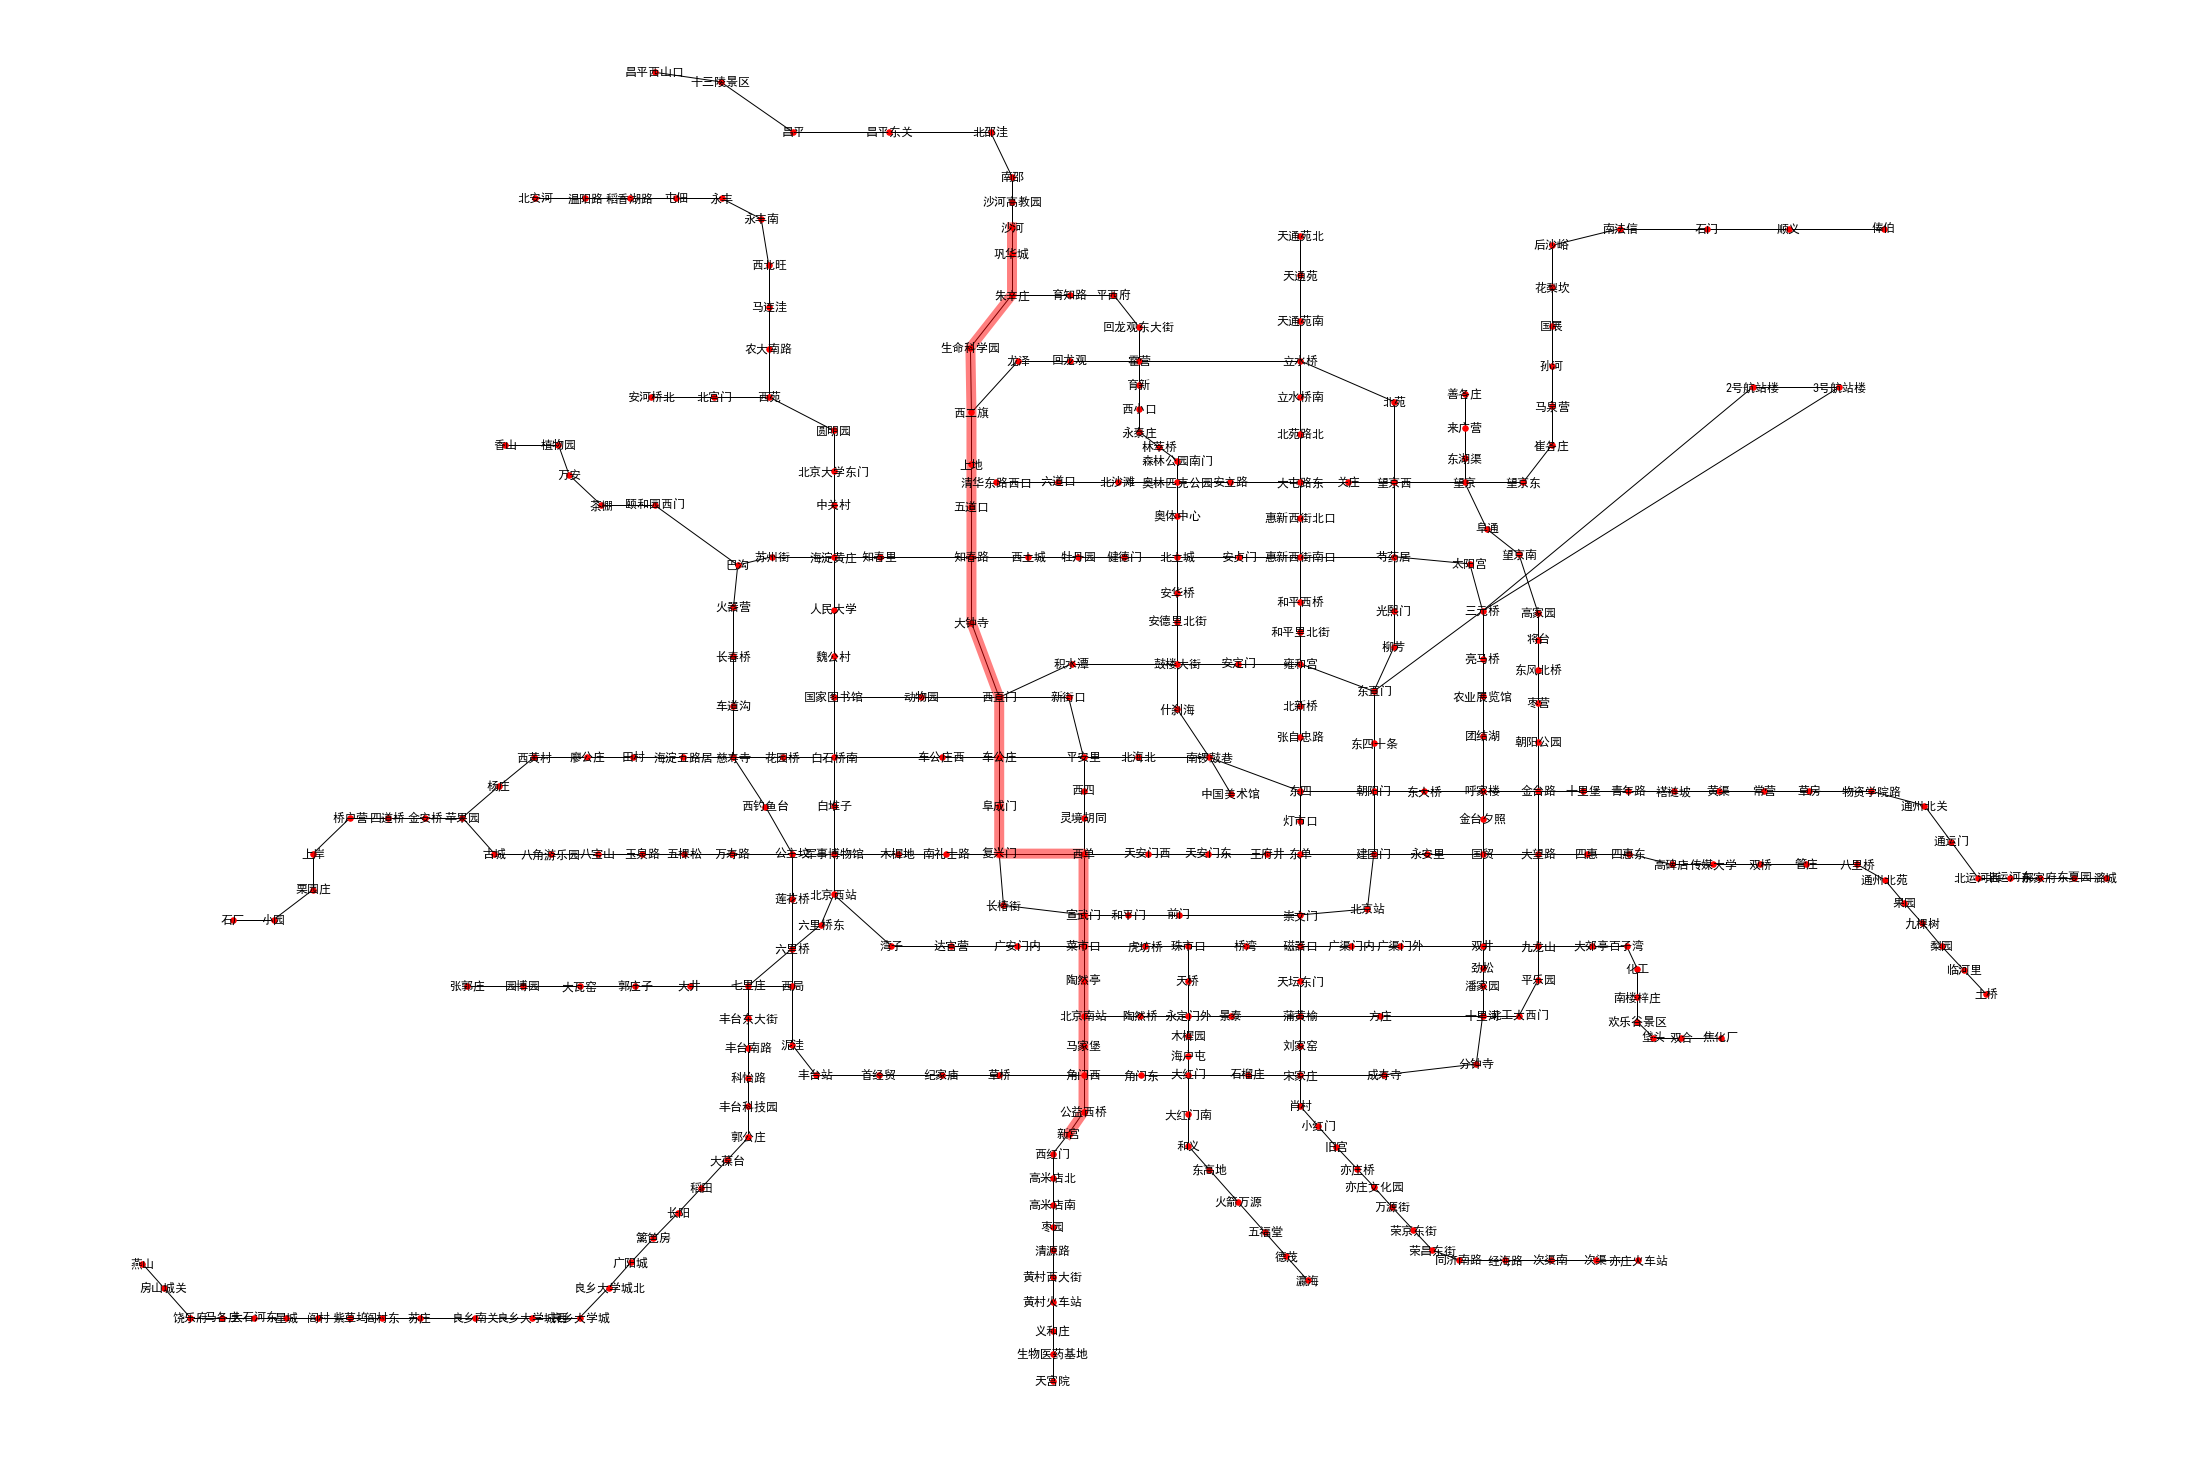

In [18]:
route.set_route_form('station')
path_with_line = route.get_route(*travel)
show_result(path_with_line)

##### 最少换乘（最少线路）的路径

[('沙河', '昌平线'), ('巩华城', '昌平线'), ('朱辛庄', '昌平线'), ('生命科学园', '昌平线'), ('西二旗', '13号线'), ('上地', '13号线'), ('五道口', '13号线'), ('知春路', '10号线'), ('知春里', '10号线'), ('海淀黄庄', '10号线'), ('苏州街', '10号线'), ('巴沟', '10号线'), ('火器营', '10号线'), ('长春桥', '10号线'), ('车道沟', '10号线'), ('慈寿寺', '10号线'), ('西钓鱼台', '10号线'), ('公主坟', '10号线'), ('莲花桥', '10号线'), ('六里桥', '10号线'), ('西局', '10号线'), ('泥洼', '10号线'), ('丰台站', '10号线'), ('首经贸', '10号线'), ('纪家庙', '10号线'), ('草桥', '10号线'), ('角门西', '4号线大兴线'), ('公益西桥', '4号线大兴线'), ('新宫', '4号线大兴线')]
--------------------------------------------------
距离：1263.02
站数：29
换乘次数：3


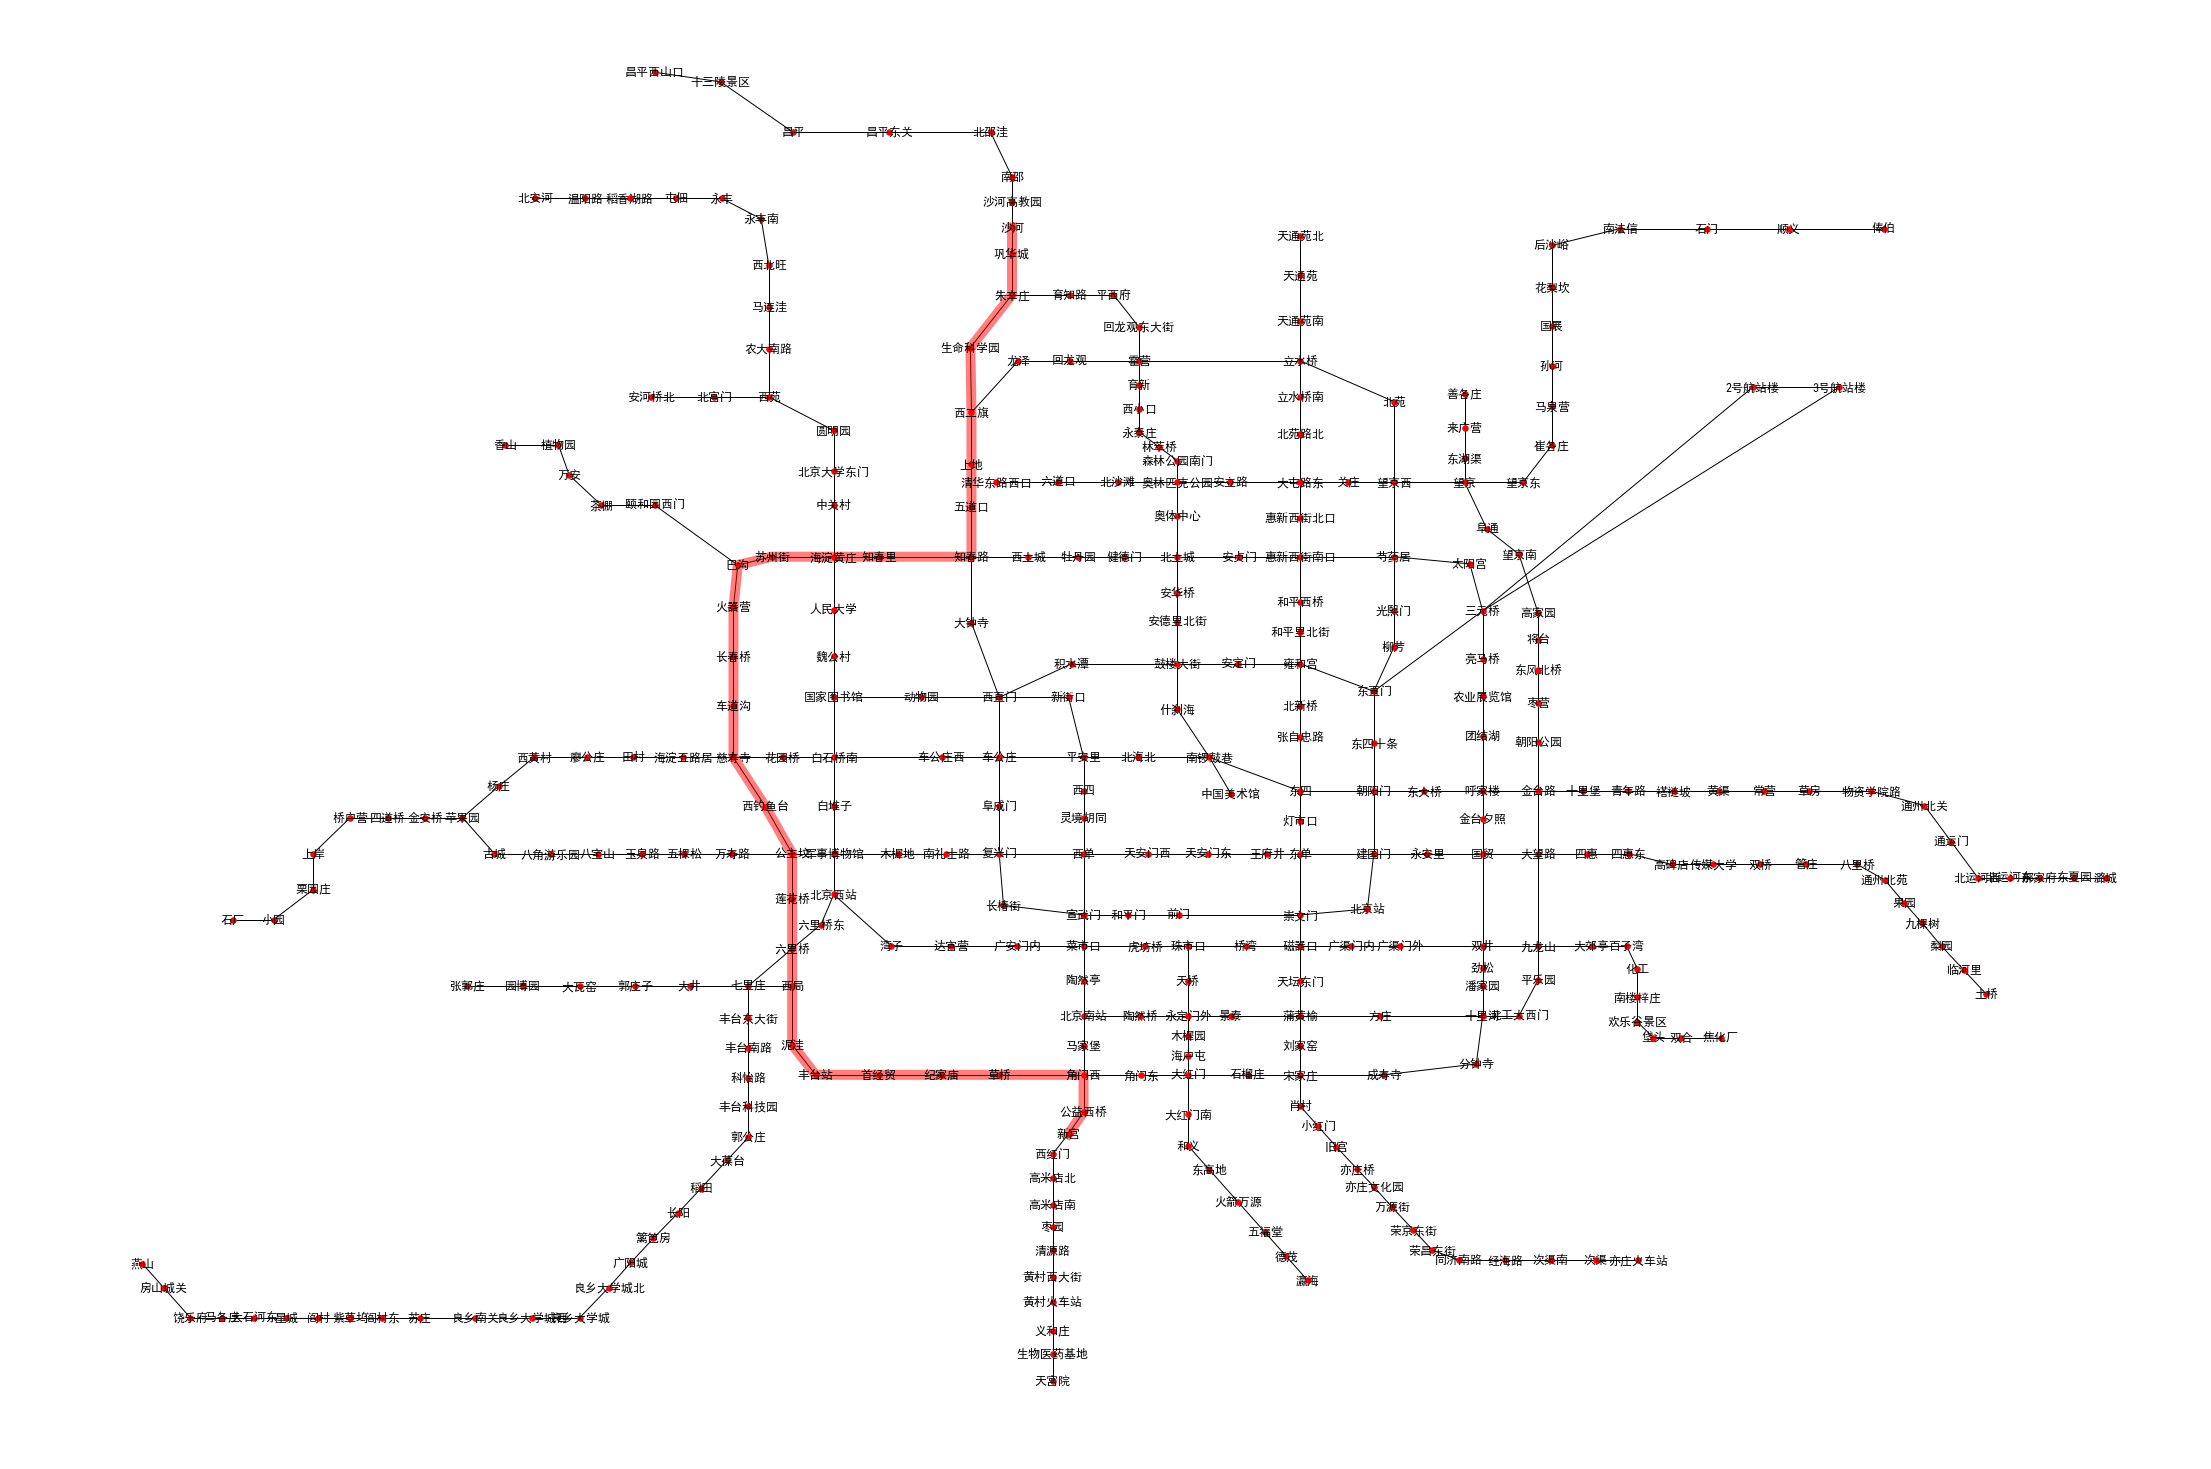

In [19]:
route.set_route_form('trans')
path_with_line = route.get_route(*travel)
show_result(path_with_line)

### 测试2

In [20]:
travel = ('奥体中心', '天安门西')

##### 最小距离的路径

[('奥体中心', '8号线北'), ('北土城', '8号线北'), ('安华桥', '8号线北'), ('安德里北街', '8号线北'), ('鼓楼大街', '8号线北'), ('什刹海', '8号线北'), ('南锣鼓巷', '6号线'), ('北海北', '6号线'), ('平安里', '4号线大兴线'), ('西四', '4号线大兴线'), ('灵境胡同', '4号线大兴线'), ('西单', '1号线'), ('天安门西', '1号线')]
--------------------------------------------------
距离：469.00
站数：13
换乘次数：3


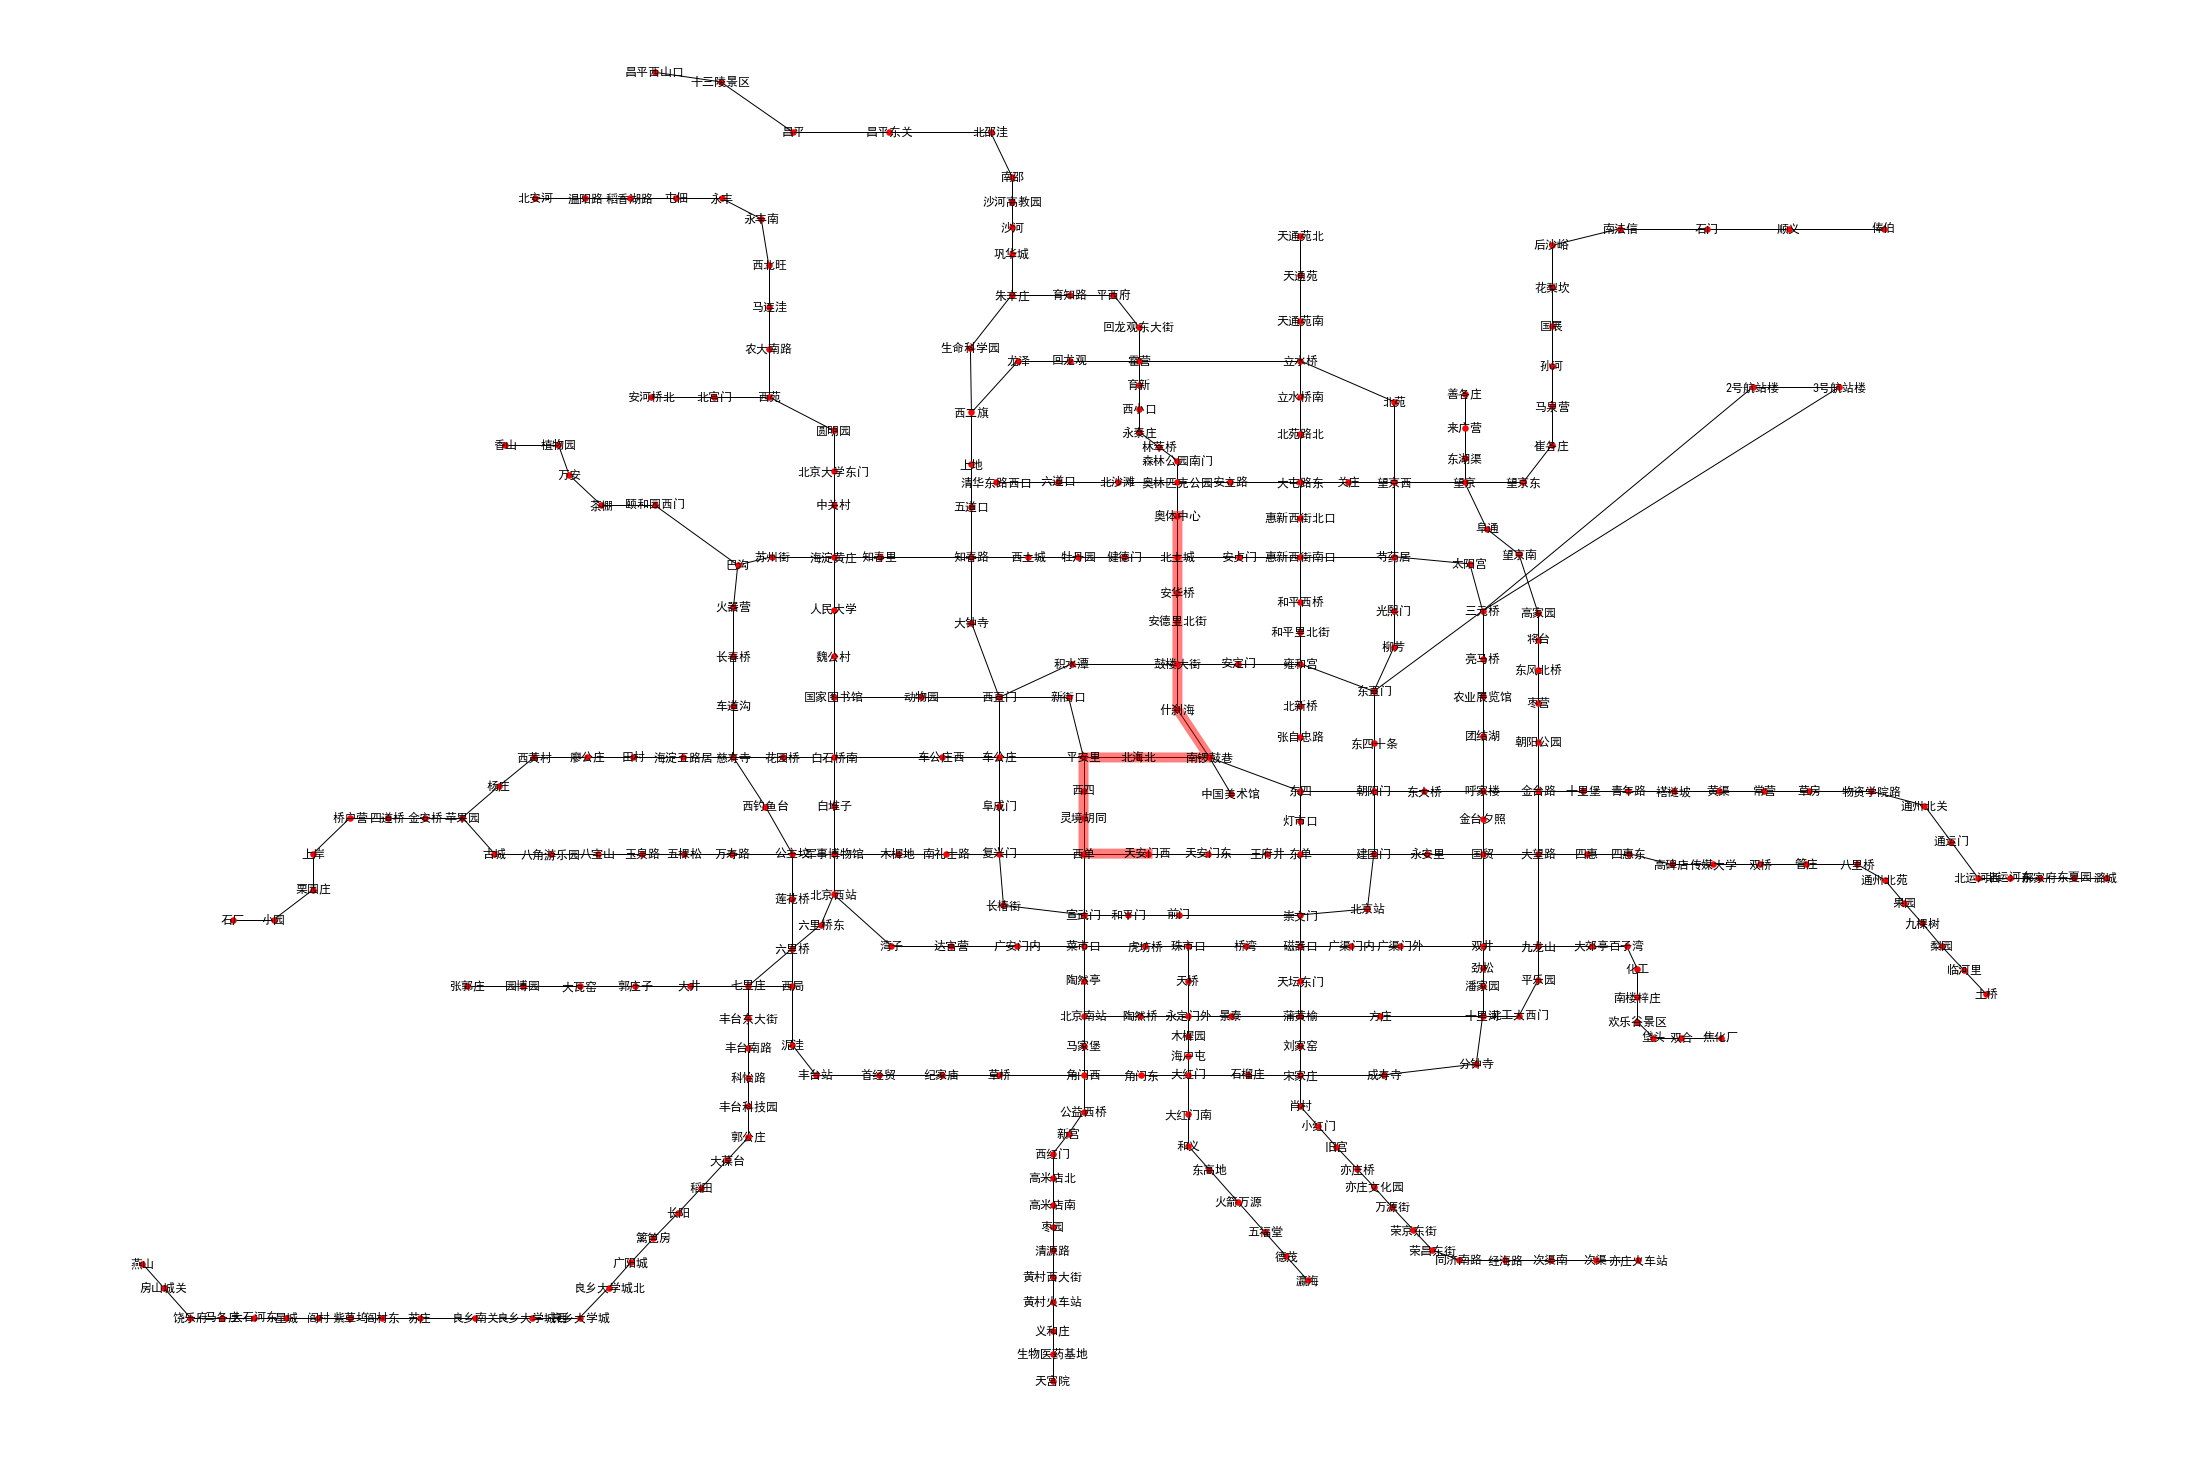

In [21]:
route.set_route_form('distance')
path_with_line = route.get_route(*travel)
show_result(path_with_line)

##### 最少站数的路径

[('奥体中心', '8号线北'), ('北土城', '8号线北'), ('安华桥', '8号线北'), ('安德里北街', '8号线北'), ('鼓楼大街', '2号线'), ('积水潭', '2号线'), ('西直门', '2号线'), ('车公庄', '2号线'), ('阜成门', '2号线'), ('复兴门', '1号线'), ('西单', '1号线'), ('天安门西', '1号线')]
--------------------------------------------------
距离：564.54
站数：12
换乘次数：2


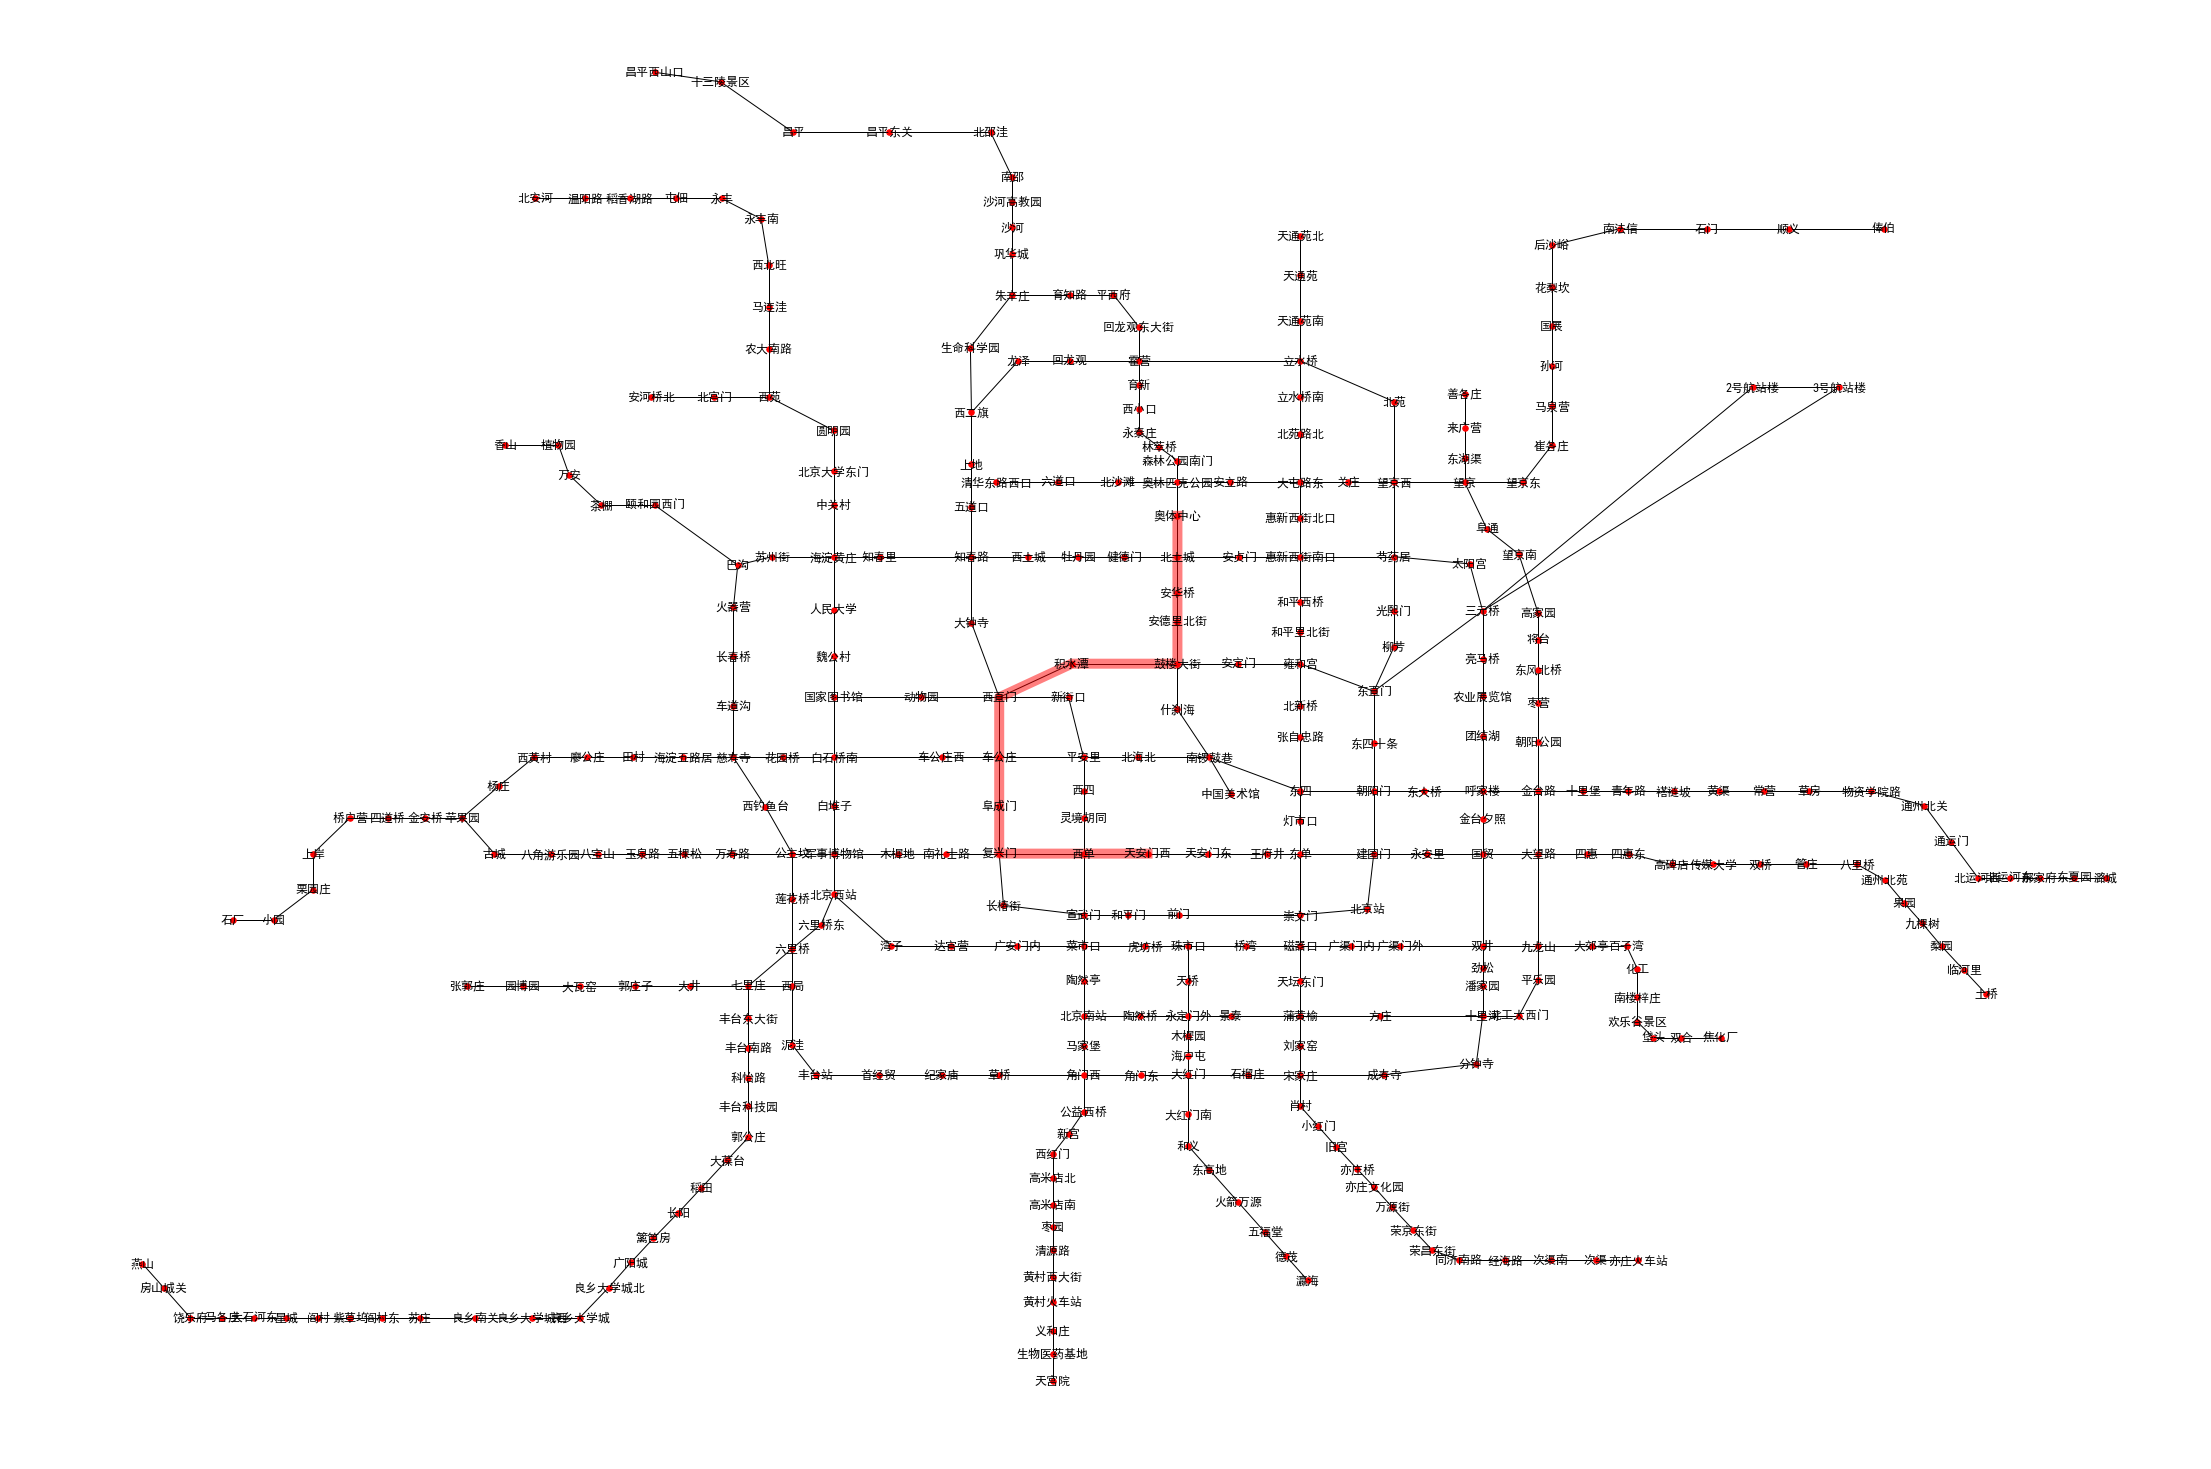

In [22]:
route.set_route_form('station')
path_with_line = route.get_route(*travel)
show_result(path_with_line)

##### 最少换乘（最少线路）的路径

[('奥体中心', '8号线北'), ('北土城', '8号线北'), ('安华桥', '8号线北'), ('安德里北街', '8号线北'), ('鼓楼大街', '2号线'), ('积水潭', '2号线'), ('西直门', '2号线'), ('车公庄', '2号线'), ('阜成门', '2号线'), ('复兴门', '1号线'), ('西单', '1号线'), ('天安门西', '1号线')]
--------------------------------------------------
距离：564.54
站数：12
换乘次数：2


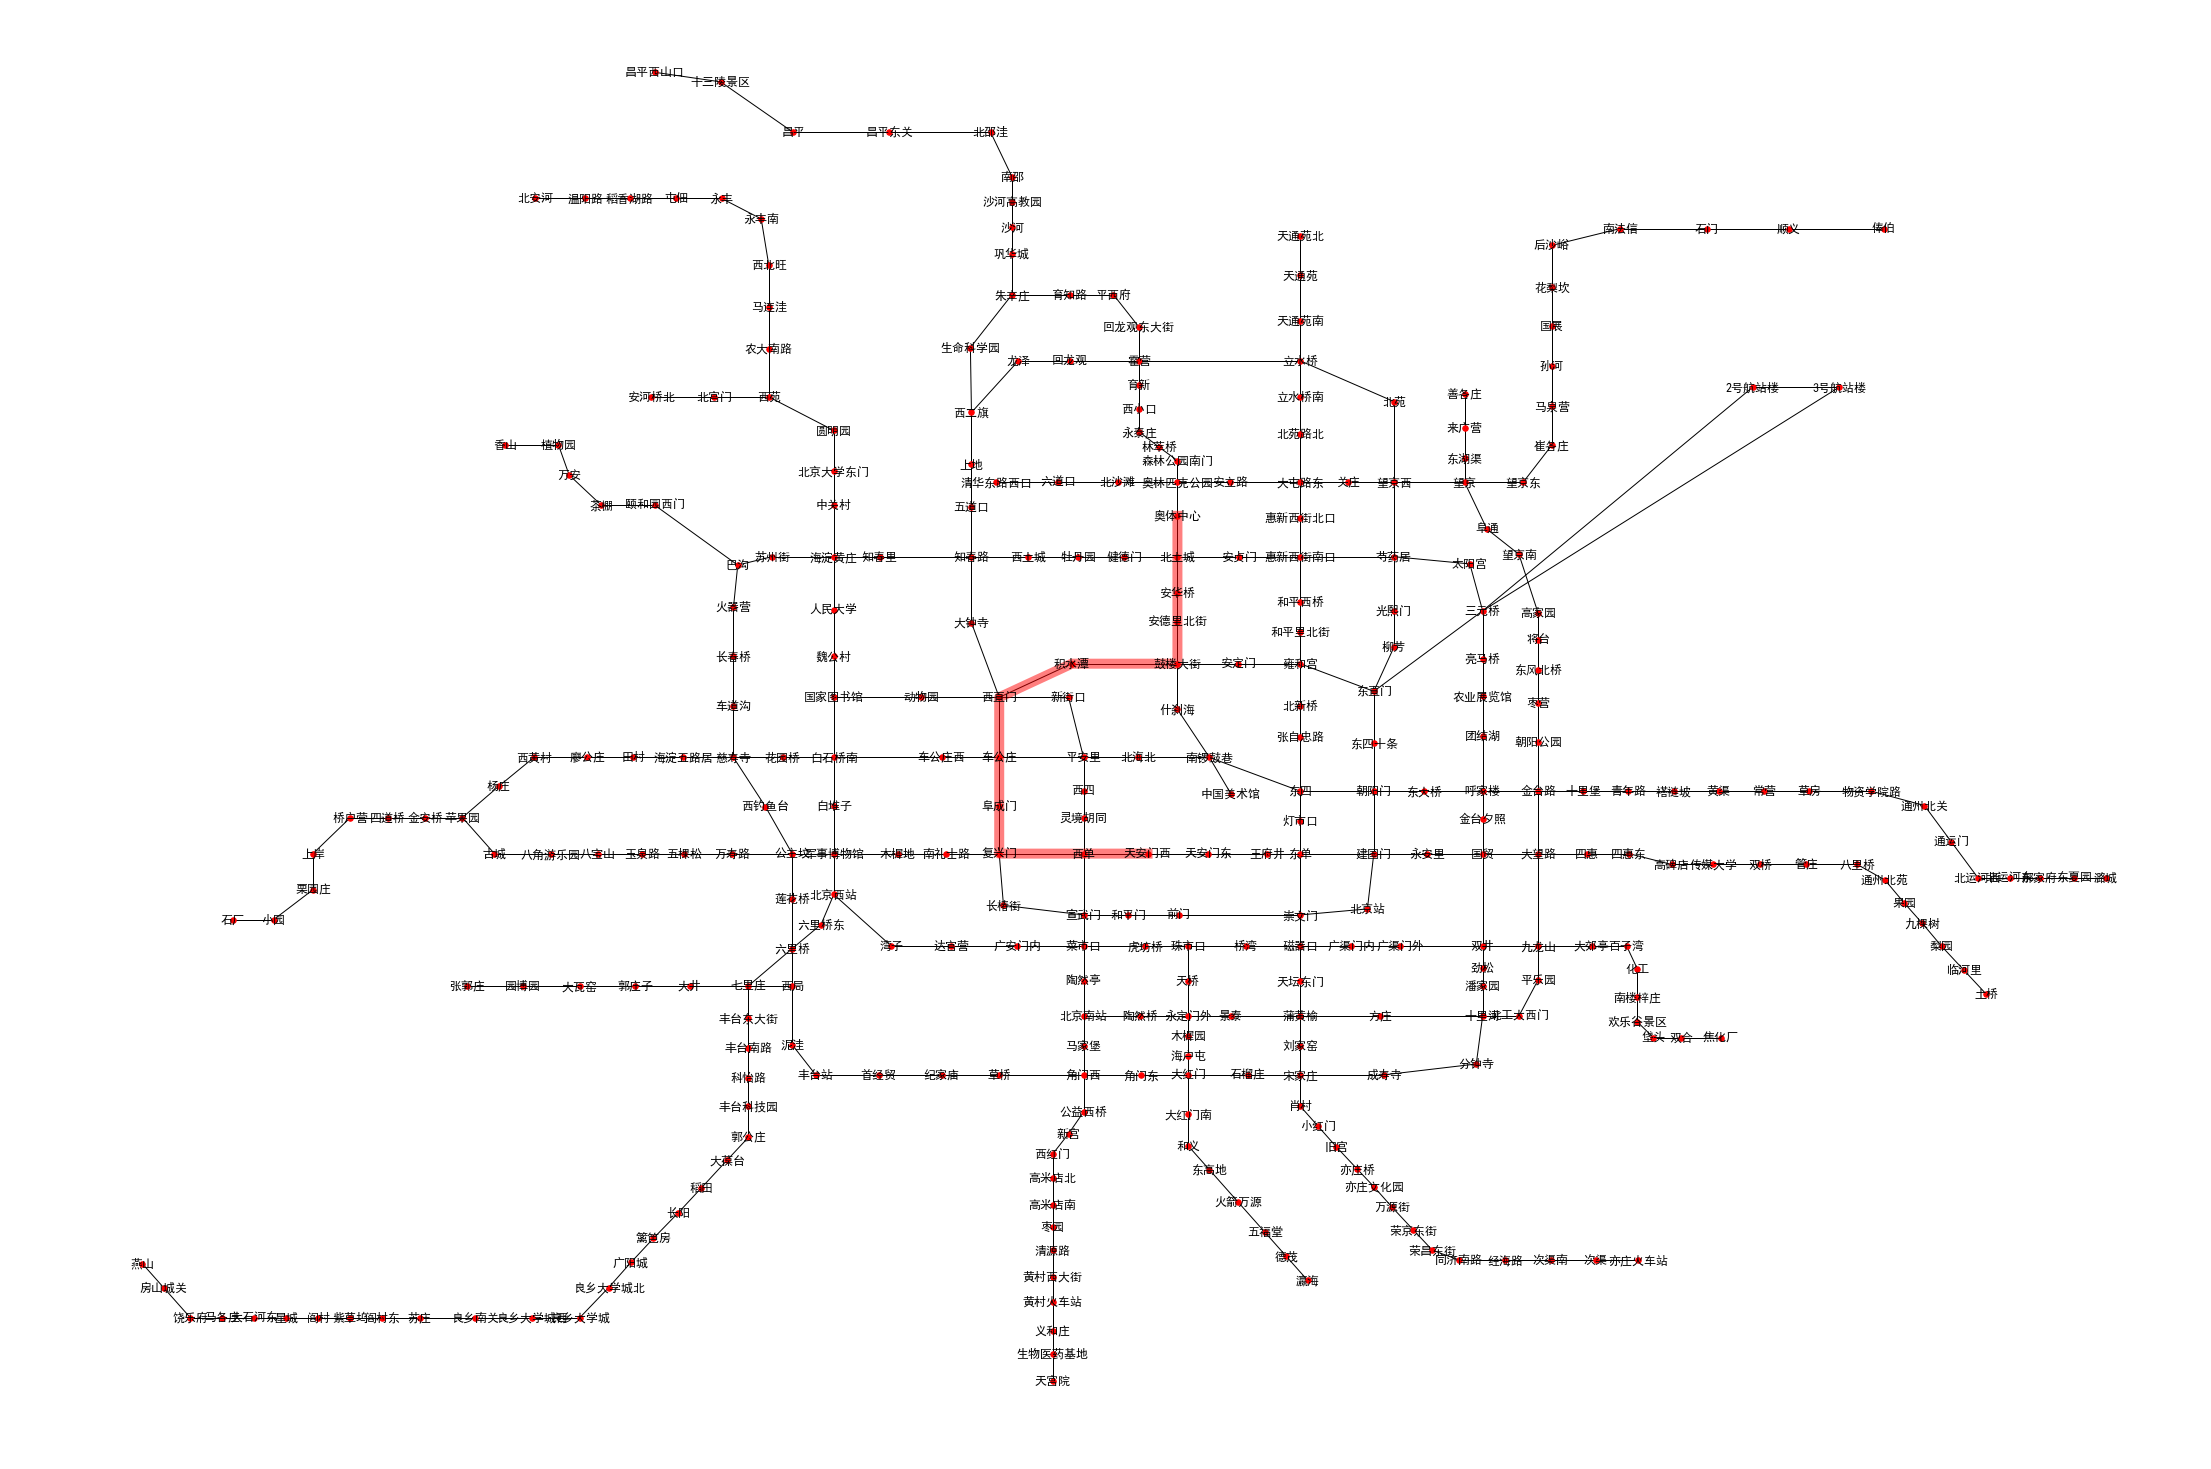

In [23]:
route.set_route_form('trans')
path_with_line = route.get_route(*travel)
show_result(path_with_line)

#      

# <center>总结</center>

## 数据结构：

+ coords 站点坐标位置，显示了每个站点的坐标
+ connection 网络连接图，显示了与当前站点连接的所有站点
+ lines 站点线路，显示了每个站点所在的所有地铁线路

## 搜索的主要思路：
+ 从开始处构造一个二维路径列表，每行代表每个路径，每次取出第一个或最后一个（具体需要结合所有路径的排列方式决定头尾）路径，获取此路径的最后一个站点，然后遍历与此站点相邻且不在此路径的站点（称为下一个站点），把所有下一个站点加入到此路径最后，再形成几个新的路径，把这些新的路径加入到路径列表，然后根据寻优的方法（距离最近、站点最少、线路最少等）对路径列表进行排序，选出局部最优的一个路径然后进行上述循环，直到找到终点站结束寻找，返回路径结果。

## 存在问题思考
+ 情景1：用户乘坐地铁，想按照最少换乘（最少线路）进行寻优的时候，如果线路中出现环，可能会出现绕着优弧（类比优弧、劣弧，我们称在环上占环长大于一半的也叫优弧，少于一半的叫劣弧）转，与绕着劣弧转相比，要多经过一些站，但换乘次数一样，这种情况显然不是我们想看到的。

+ 情景2：与情景一相反，用户想经过最少的站，搜索结果发现有多种最少站的路线，这时，肯定是越少换乘的线路越好，怎么把在经过站数最少的前提下，换乘最少的线路搜索出来？

+ 情景3：试想我们自己乘坐地铁，在某种特定的情况下，我们有对线路的考量，这里提出“优先考虑”的概念。比如小明腿脚不便，时间充裕，乘坐地铁少换乘因该是最优先考虑的因素，其次可能是经过最少的站，再其次就是线路距离最短。
